In [1]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier


In [2]:
#Load Data, Read CSV
df = pd.read_csv("placementdata.csv")

In [3]:
#Information of data
print(df.info())
#print Columns
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB
None
Index(['StudentID', 'CGPA', 'Internship

In [4]:
#print head top 5 data
print(df.head())

   StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
0          1   7.5            1         1                         1   
1          2   8.9            0         3                         2   
2          3   7.3            1         2                         2   
3          4   7.5            1         1                         2   
4          5   8.3            1         2                         2   

   AptitudeTestScore  SoftSkillsRating ExtracurricularActivities  \
0                 65               4.4                        No   
1                 90               4.0                       Yes   
2                 82               4.8                       Yes   
3                 85               4.4                       Yes   
4                 86               4.5                       Yes   

  PlacementTraining  SSC_Marks  HSC_Marks PlacementStatus  
0                No         61         79       NotPlaced  
1               Yes         78         82   

In [5]:
#Handle missing value
print(df.isnull().sum())
#Indentified Shape of data
print(df.shape)
#Mean values
mean_value = df[['CGPA','AptitudeTestScore','SoftSkillsRating']].mean()
print(mean_value)
#Mode values
mode_value = df[['Projects','Workshops/Certifications','ExtracurricularActivities','PlacementTraining']].mode()
print(mode_value)

StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64
(10000, 12)
CGPA                  7.69801
AptitudeTestScore    79.44990
SoftSkillsRating      4.32396
dtype: float64
   Projects  Workshops/Certifications ExtracurricularActivities  \
0         3                         0                       Yes   

  PlacementTraining  
0               Yes  


In [6]:
df=df.drop(['StudentID','SoftSkillsRating','SSC_Marks','ExtracurricularActivities'],axis=1)

# Summary statistics of numerical columns
print(df.describe())

               CGPA   Internships      Projects  Workshops/Certifications  \
count  10000.000000  10000.000000  10000.000000              10000.000000   
mean       7.698010      1.049200      2.026600                  1.013200   
std        0.640131      0.665901      0.867968                  0.904272   
min        6.500000      0.000000      0.000000                  0.000000   
25%        7.400000      1.000000      1.000000                  0.000000   
50%        7.700000      1.000000      2.000000                  1.000000   
75%        8.200000      1.000000      3.000000                  2.000000   
max        9.100000      2.000000      3.000000                  3.000000   

       AptitudeTestScore     HSC_Marks  
count       10000.000000  10000.000000  
mean           79.449900     74.501500  
std             8.159997      8.919527  
min            60.000000     57.000000  
25%            73.000000     67.000000  
50%            80.000000     73.000000  
75%            87.0

In [7]:
# Remove leading/trailing spaces
df.columns = df.columns.str.strip()
print(df.columns)

Index(['CGPA', 'Internships', 'Projects', 'Workshops/Certifications',
       'AptitudeTestScore', 'PlacementTraining', 'HSC_Marks',
       'PlacementStatus'],
      dtype='object')


In [8]:
encoder = LabelEncoder()
df[['PlacementStatus', 'PlacementTraining']] = df[['PlacementStatus', 'PlacementTraining']].apply(encoder.fit_transform)


In [9]:
# Split Data into Train & Test

x = df[['CGPA', 'Projects','Workshops/Certifications','AptitudeTestScore', 'Internships','HSC_Marks']] #Independent Variables
y = df['PlacementStatus'] #Target Variable

#Splitting data into 80% train, 20% test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.20, random_state=42 )

# Scale numerical features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

# Train Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(x_train, y_train)

# Save models and scaler
with open("logistic_regression_model.pkl", "wb") as f:
    pickle.dump(log_reg, f)

with open("decision_tree_model.pkl", "wb") as f:
    pickle.dump(decision_tree, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
    
# Save data statistics for filling missing values
data_stats = {
    "mean": df[['CGPA','AptitudeTestScore','HSC_Marks']].mean().to_dict(),
    "mode": df[['Projects','Workshops/Certifications','PlacementTraining']].mode().iloc[0].to_dict()
}

with open("data_statistics.pkl", "wb") as f:
    pickle.dump(data_stats, f)

# Make predictions
y_pred_log_reg = log_reg.predict(x_test)
y_pred_decision_tree = decision_tree.predict(x_test)


In [10]:
# Evaluate models
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
decision_tree_acc = accuracy_score(y_test, y_pred_decision_tree)

log_reg_report = classification_report(y_test, y_pred_log_reg)
decision_tree_report = classification_report(y_test, y_pred_decision_tree)

print(log_reg_acc)
print(decision_tree_acc)
print(decision_tree_report)

0.784
0.684
              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1172
           1       0.61      0.64      0.63       828

    accuracy                           0.68      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.69      0.68      0.68      2000



In [11]:
# Confusion matrices
log_reg_cm = confusion_matrix(y_test, y_pred_log_reg)
decision_tree_cm = confusion_matrix(y_test, y_pred_decision_tree)

print(log_reg_cm)
print(decision_tree_cm)

[[954 218]
 [214 614]]
[[840 332]
 [300 528]]


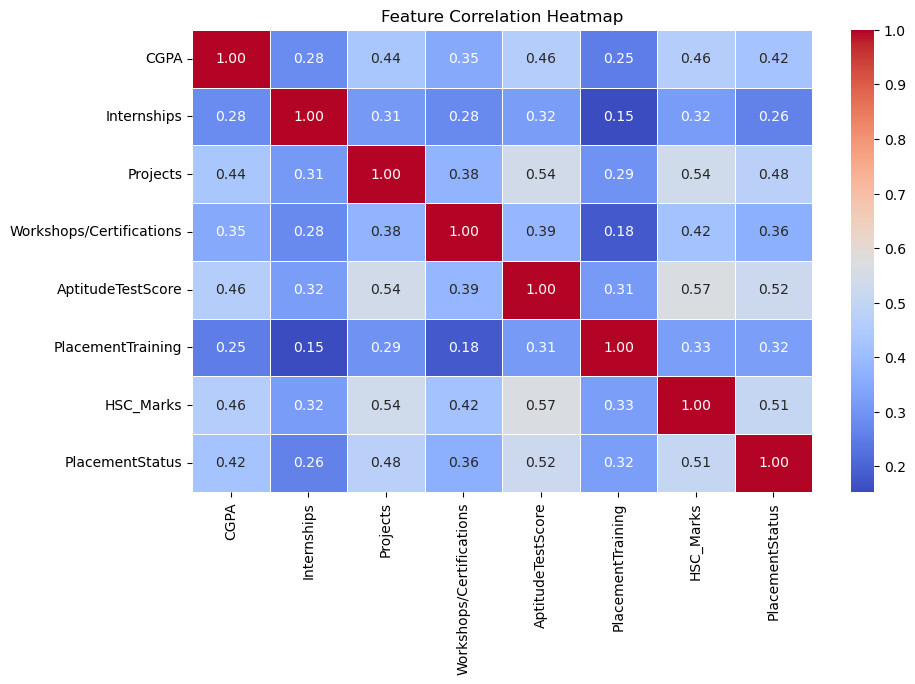

In [12]:
# 1. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

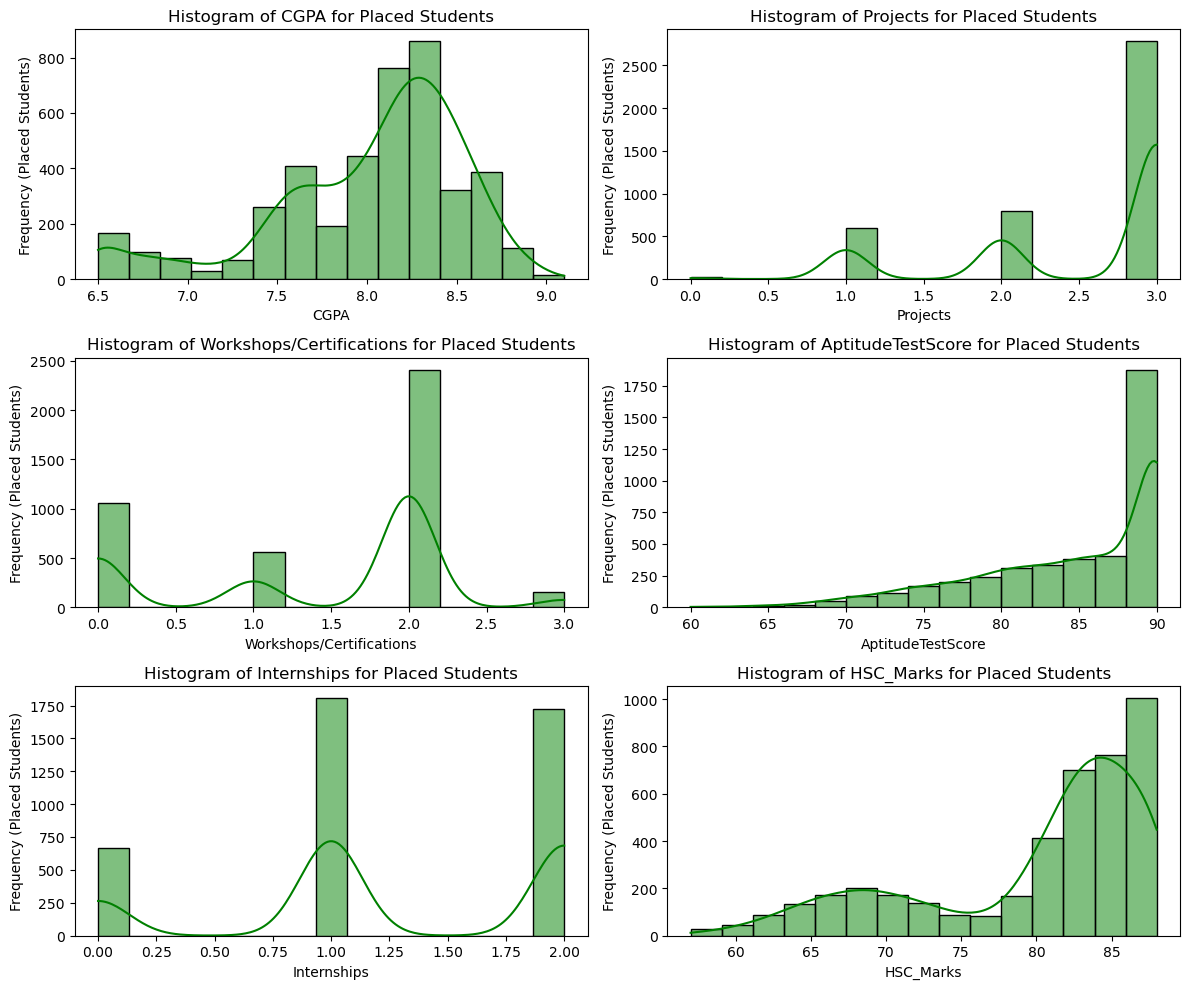

In [13]:
# 2. Histogram where frequency of students equals number of students placed
placed_students = df[df['PlacementStatus'] == 1]  # Filter only placed students
features = ['CGPA', 'Projects', 'Workshops/Certifications', 'AptitudeTestScore', 'Internships','HSC_Marks']

plt.figure(figsize=(12, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(placed_students[feature], bins=15, kde=True, color='green')
    plt.xlabel(feature)
    plt.ylabel('Frequency (Placed Students)')
    plt.title(f'Histogram of {feature} for Placed Students')

plt.tight_layout()
plt.show()

In [14]:
import joblib
import tkinter as tk
from tkinter import ttk
model = LogisticRegression()
model.fit(x_train, y_train)

# Save the model and scaler
joblib.dump(model,"placement_model.pkl")
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [15]:
## # Load Model and Scaler
model = joblib.load("placement_model.pkl")
scaler = joblib.load("scaler.pkl")

# Predefined dropdown values
dropdown_values = {
    "CGPA": [5.0, 6.0, 7.0, 8.0, 9.0, 10.0],
    "Projects": [0, 1, 2, 3, 4, 5],
    "Workshops/Certifications": [0, 1, 2, 3, 4, 5],
    "Aptitude Test Score": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    "Internships": [0, 1, 2, 3, 4,5],
    "HSC_Marks": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
}

# Function to Predict Placement
def predict_placement():
    try:
        # Get user input
        cgpa = float(entry_cgpa.get())
        if cgpa > 10:
            show_result(None, "CGPA not valid. Enter a value between 0-10.")
            return
            
        projects = int(entry_projects.get())
        if projects > 10 or projects < 0:
            show_result(None, "Project must between 0 to 10.")
            return
        workshops_certifications = int(entry_workshops_certifications.get())
        if workshops_certifications > 10 or workshops_certifications < 0:
            show_result(None, "Workshops/certifications must between 0 to 10.")
            return
        aptitudeTestScore = float(entry_aptitudeTestScore.get())
        if aptitudeTestScore > 100 or aptitudeTestScore < 0:
            show_result(None, "Aptitude is must between 0 to 100")
            return

        internships = int(entry_internships.get())
        if internships > 10 or internships < 0:
            show_result(None, "Internships is must between 0 to 10")
            return

        hscMarks = float(entry_hscMarks.get())
        if hscMarks > 100 or hscMarks < 0:
            show_result(None, "Hsc Marks is must between 0 to 100")
            return

        # Prepare input data
        input_data = np.array([[cgpa, projects, workshops_certifications, aptitudeTestScore, internships,hscMarks]])
        input_data = scaler.transform(input_data)

        # Make prediction
        prediction = model.predict(input_data)
        placed = prediction[0] == 1

        # Show styled output box
        show_result(placed)

    except ValueError:
        show_result(None, "❌ Invalid Input\nPlease enter valid numeric values.")

# Function to Show Custom Result Box
def show_result(placed, custom_message=None):
    result_box = tk.Toplevel(root)
    result_box.geometry("400x200")
    result_box.resizable(False, False)

    if custom_message:
        result_box.config(bg="#6c757d")  # Gray for error
        title = "Error"
        message = custom_message
        color = "#ffcc00"
    elif placed is None:
        result_box.config(bg="#6c757d")  # Gray for error
        title = "Error"
        message = "❌ Invalid Input\nPlease enter valid numeric values."
        color = "#ffcc00"
    elif placed:
        result_box.config(bg="#28a745")  # Green for Placed
        title = "Congratulations!"
        message = "✅ Placed\nYou have a high chance of placement!"
        color = "white"
    else:
        result_box.config(bg="#dc3545")  # Red for Not Placed
        title = "Better Luck Next Time!"
        message = "❌ Not Placed\nKeep improving your skills and try again."
        color = "white"

    # Title Label
    title_label = tk.Label(result_box, text=title, font=("Arial", 18, "bold"), bg=result_box["bg"], fg=color)
    title_label.pack(pady=10)

    # Message Label
    message_label = tk.Label(result_box, text=message, font=("Arial", 14), bg=result_box["bg"], fg=color)
    message_label.pack(pady=10)

    # Close Button
    close_btn = tk.Button(result_box, text="Close", font=("Arial", 12, "bold"), bg="#343a40", fg="white",
                          activebackground="#23272b", activeforeground="white", command=result_box.destroy)
    close_btn.pack(pady=10)

# Function to Exit Application
def exit_application():
    root.destroy()

# Create Main Window
root = tk.Tk()
root.title("Placement Prediction")
root.geometry("600x600")  # Increased size for better spacing
root.config(bg="#1E1E2E")  # Dark Background

# Styling
style = ttk.Style()
style.configure("TLabel", font=("Arial", 14), background="#1E1E2E", foreground="white")
style.configure("TEntry", font=("Arial", 14), padding=5)
style.configure("TButton", font=("Arial", 14, "bold"), background="#4A90E2", foreground="white", padding=10)

# Big Box Container
container = tk.Frame(root, bg="#2A2D3E", bd=5, relief="ridge")
container.place(relx=0.5, rely=0.5, anchor="center", width=500, height=450)

# Title
title_label = tk.Label(container, text="Placement Prediction", font=("Arial", 18, "bold"), bg="#2A2D3E", fg="white")
title_label.pack(pady=15)

# Input Frame
input_frame = tk.Frame(container, bg="#2A2D3E")
input_frame.pack()

# Input Fields with Labels
entries = {}
for i, (label, values) in enumerate(dropdown_values.items()):
    ttk.Label(input_frame, text=label).grid(row=i, column=0, pady=8, padx=10, sticky="w")
    var = tk.StringVar()
    combobox = ttk.Combobox(input_frame, textvariable=var, values=values, width=22, state="normal")
    combobox.grid(row=i, column=1, pady=8, padx=10)
    #combobox.set(values[0])  # Default value
    entries[label] = combobox

entry_cgpa = entries["CGPA"]
entry_projects = entries["Projects"]
entry_workshops_certifications = entries["Workshops/Certifications"]
entry_aptitudeTestScore = entries["Aptitude Test Score"]
entry_internships = entries["Internships"]
entry_hscMarks = entries["HSC_Marks"]

# Button with hover effect
def on_enter(e):
    predict_btn.config(bg="#316AC5")

def on_leave(e):
    predict_btn.config(bg="#4A90E2")

predict_btn = tk.Button(container, text="Predict Placement", font=("Arial", 14, "bold"), bg="#4A90E2", fg="white",
                        activebackground="#316AC5", activeforeground="white", padx=10, pady=5, command=predict_placement)
predict_btn.pack(pady=15)

predict_btn.bind("<Enter>", on_enter)
predict_btn.bind("<Leave>", on_leave)

# Exit Button
exit_btn = tk.Button(container, text="Exit", font=("Arial", 14, "bold"), bg="#D9534F", fg="white",
                     activebackground="#A94442", activeforeground="white", padx=10, pady=5, command=exit_application)
exit_btn.pack(pady=10)

warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# Run GUI
root.mainloop()
